In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань¶

# все годы
      t  - температура
      p  - давление
      ws - скорость ветра
    wdir - направление ветра

In [2]:
weather = pd.read_csv('weather.csv', index_col = ['year','month','day'])
weather.shape

(8759, 6)

In [3]:
months = ['Ja', 'Fe', 'Ma', 'Ap', 'May', 'June', 'July', 'Au', 'Se', 'Oc', 'No', 'De']
dictmonth = {1: {'a': 'Ян', 'f': 'Январь'}, 
             2: {'a': 'Фе', 'f': 'Февраль'}, 
             3: {'a': 'Март', 'f': 'Март'},
             4: {'a': 'Ап', 'f': 'Апрель'},
             5: {'a': 'Май', 'f': 'Май'},
             6: {'a': 'Июнь', 'f': 'Июнь'},
             7: {'a': 'Июль', 'f': 'Июль'},
             8: {'a': 'Ав', 'f': 'Август'},
             9: {'a': 'Се', 'f': 'Сентябрь'}, 
            10: {'a': 'Ок', 'f': 'Октябрь'},
            11: {'a': 'Но', 'f': 'Ноябрь'},
            12: {'a': 'Де', 'f': 'Декабрь'}}
colors = ['#E7EB0A', '#1AD90D',
          '#0722ED', '#a064b0', '#117E7D',
          '#77877C',
          '#E11414', '#E4800F', '#7E7711']
seasons = ['зима', 'весна', 'лето', 'осень']

# сила ветра

#### средняя сила ветра, медиана скорости

In [4]:
midspeed = weather['wspeed'].mean().round(2)
print(f'средняя скорость ветра в Рязани за отобранный период времени {midspeed} м/с')
medspeed = weather['wspeed'].median()
print(f'медиана скорости ветра {medspeed} м/с')

средняя скорость ветра в Рязани за отобранный период времени 2.79 м/с
медиана скорости ветра 3.0 м/с


###### средняя сила ветра по времени года

In [5]:
wsm = weather.groupby(['month']).agg({'wspeed':'mean'})
print('средняя скорость:\nзимой:', *wsm.loc[[12, 1, 2]].mean().round(2),\
      '\nвесной:', *wsm.loc[[3, 4, 5]].mean().round(2),\
      '\nлетом:', *wsm.loc[[6, 7, 8]].mean().round(2),\
      '\nосенью:', *wsm.loc[[9, 10, 11]].mean().round(2))
print('\nмедиана скорости:\nзимой:', *wsm.loc[[12, 1, 2]].median().round(2),\
      '\nвесной:', *wsm.loc[[3, 4, 5]].median().round(2),\
      '\nлетом:', *wsm.loc[[6, 7, 8]].median().round(2),\
      '\nосенью:', *wsm.loc[[9, 10, 11]].median().round(2))

средняя скорость:
зимой: 2.82 
весной: 3.18 
летом: 2.49 
осенью: 2.7

медиана скорости:
зимой: 2.74 
весной: 3.26 
летом: 2.42 
осенью: 2.68


###### средняя скорость ветра по месяцам

In [6]:
for i in wsm.index:
    print(dictmonth[i]['f'], *wsm.loc[i].values.round(2))

Январь 2.74
Февраль 2.98
Март 3.26
Апрель 3.27
Май 3.01
Июнь 2.63
Июль 2.42
Август 2.4
Сентябрь 2.52
Октябрь 2.89
Ноябрь 2.68
Декабрь 2.72


###### максимальная скорость

In [7]:
spmax = weather[weather['wspeed'] == weather['wspeed'].max()]
print(spmax.index[0][2], dictmonth[spmax.index[0][1]]['f'], spmax.index[0][0], '-', *spmax['wspeed'].values, 'м/с')

7 Октябрь 2003 - 10 м/с


### средняя сила ветра по годам

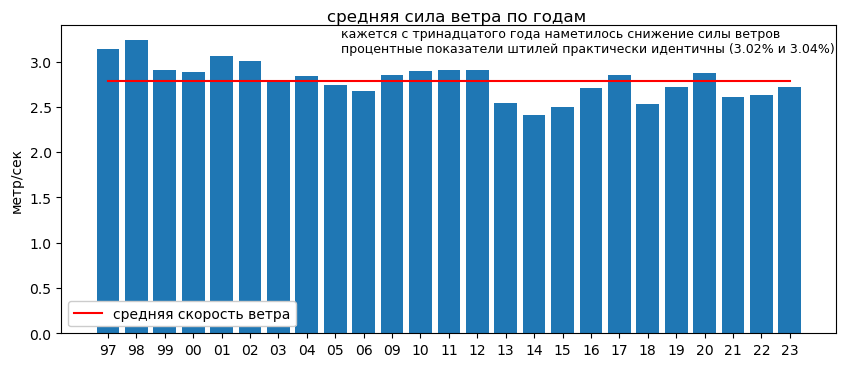

In [8]:
midspeedyear = weather.groupby('year').agg({'wspeed':'mean'})
fig8 = plt.figure(figsize=(10, 4))
fig8.suptitle('средняя сила ветра по годам',x=0.52,y=0.92, fontsize=12)
ax_msy = fig8.add_subplot()
dwpy = pd.read_json('napravlenie_vetrov/dir_wind_percent_year.json')
s97po12 = dwpy.loc['Ш'][:14].mean().round(2)
s13po23 = dwpy.loc['Ш'][14:].mean().round(2)
ax_msy.bar(np.arange(len(midspeedyear.index.values)), height=midspeedyear['wspeed'].values)
ax_msy.plot(np.arange(len(midspeedyear.index.values)), np.full(25, midspeed), label='средняя скорость ветра', c='r')
ax_msy.xaxis.set_major_locator(FixedLocator(np.arange(len(midspeedyear.index.values))))
ax_msy.xaxis.set_major_formatter(FixedFormatter([str(i)[2:] for i in midspeedyear.index.values]))
ax_msy.text(8.2, 3.1, f'кажется с тринадцатого года наметилось снижение силы ветров\
\nпроцентные показатели штилей практически идентичны ({s97po12}% и {s13po23}%)', fontsize=9)
ax_msy.set_ylabel('метр/сек')
ax_msy.legend(loc=3, framealpha=1);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


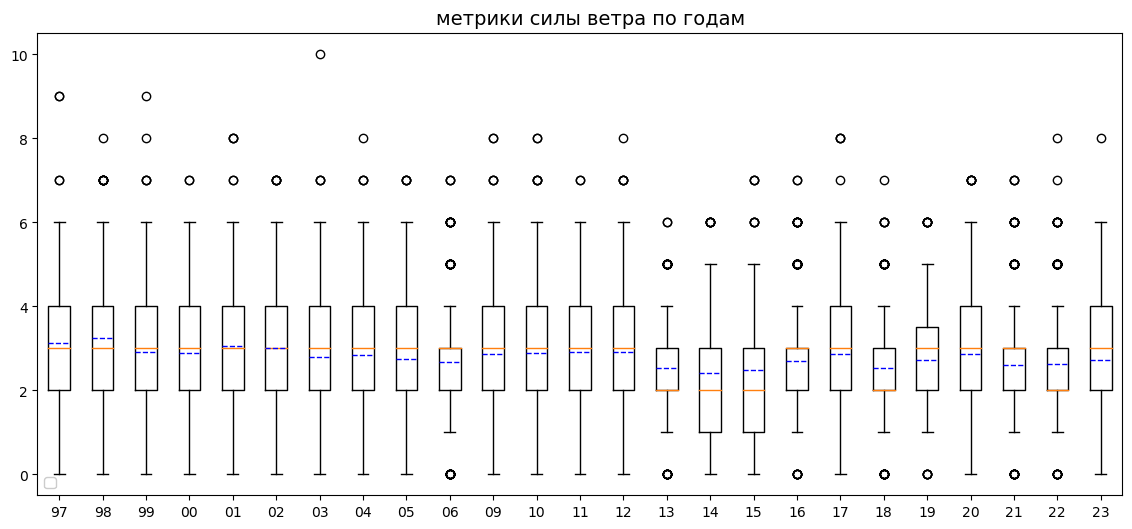

In [34]:
yws = {}
for i, j in weather.groupby('year'):
    yws.update({str(i)[2:]: j['wspeed'].values})
fig9 = plt.figure(figsize=(14, 6))
fig9.suptitle('метрики силы ветра по годам',x=0.52,y=0.92, fontsize=14)
ax_msy2 = fig9.add_subplot()
ax_msy2.boxplot(x=yws.values(), labels=yws.keys(),\
                whis=1,\
                showmeans=True, meanline=True, meanprops={'color': 'b'})
ax_msy2.legend(loc=3, framealpha=1);

### средняя сила ветра по месяцам

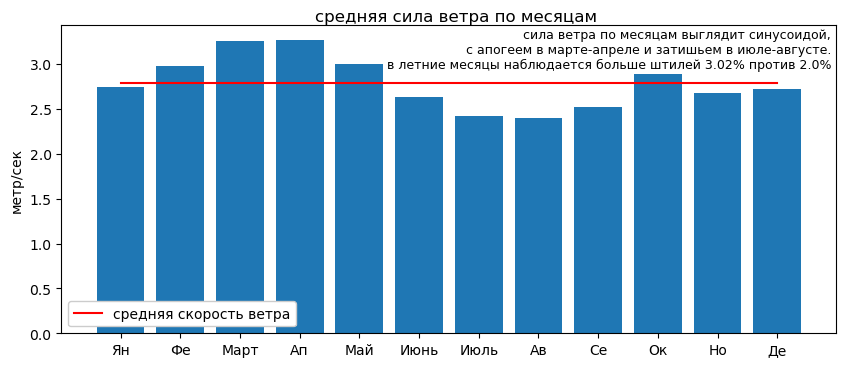

In [10]:
midspeedmonth = weather.groupby('month').agg({'wspeed':'mean'})
num = np.arange(len(midspeedmonth.index.values))
fig10 = plt.figure(figsize=(10, 4))
fig10.suptitle('средняя сила ветра по месяцам',x=0.52,y=0.92, fontsize=12)
ax_msm = fig10.add_subplot()
ax_msm.bar(num, height=midspeedmonth['wspeed'].values)
ax_msm.plot(num, np.full(12, midspeed), label='средняя скорость ветра', c='r')
ax_msm.xaxis.set_major_locator(FixedLocator(num))
ax_msm.xaxis.set_major_formatter(FixedFormatter([dictmonth[i+1]['a'] for i in num]))
ax_msm.set_ylabel('метр/сек')
dwpm = pd.read_json('napravlenie_vetrov/dir_wind_percent_month.json')
vesna = dwpm[['2', '3', '4', '5']].loc['Ш'].mean().round(2)
leto = dwpm[['6', '7', '8', '9']].loc['Ш'].mean().round(2)
ax_msm.text(11.9, 2.95,\
           f'сила ветра по месяцам выглядит синусоидой,\
\nс апогеем в марте-апреле и затишьем в июле-августе.\
\nв летние месяцы наблюдается больше штилей {leto}% против {vesna}%', fontsize=9, ha='right');
ax_msm.legend(loc=3, framealpha=1);

#### средняя сила ветра по временам года

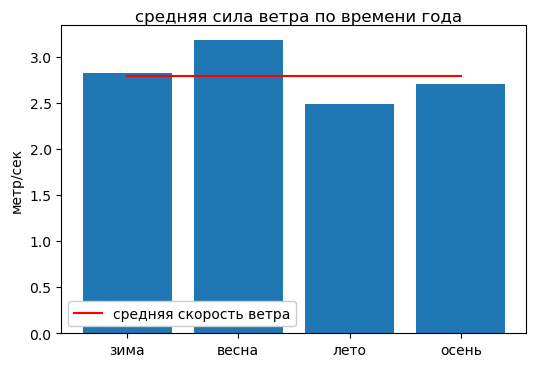

In [11]:
fig11 = plt.figure(figsize=(6, 4))
fig11.suptitle('средняя сила ветра по времени года',x=0.52,y=0.92, fontsize=12)
num = 0
dict1 = {} 
for i in range(-1, 11, 3):
    seas = midspeedmonth.iloc[[i+j for j in range (3)]].mean().round(2)
    dict1.update({seasons[num] :seas[0]})
    num += 1
dict1.keys()
ax_ssm = fig11.add_subplot()
ax_ssm.bar(dict1.keys(), height=dict1.values())
ax_ssm.plot(np.arange(4), np.full(4, midspeed), label='средняя скорость ветра', c='r')
ax_ssm.set_ylabel('метр/сек')
ax_ssm.legend(loc=3, framealpha=1);